## 
## 
### Anthony Marsilio
### Professor Binowski
## 

<p><b>Final Project for CMP 262 - Data Science Programming</b></p>
<p><b>May 9th, 2023</b></p>

In [2]:
## importing libraries

import requests as req
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import re
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
## method for requesting the data from WBA website

def requestData(url):
    r = req.get(url)
    page = r.text
    return page

In [4]:
## specific url for this webpage we are scraping

url = "https://www.westbranchresort.com/delaware-fishing-report"

In [5]:
## requesting data from WBA webpage with request

wbaFish = requestData(url)

In [6]:
## method for making soup out of the webscrape from WBA

def soupIt(scrape):
    soup = bs(scrape)
    return soup

In [7]:
## making soup from the webscrape

wbaFishSoup = soupIt(wbaFish)

In [9]:
## making a search to narrow down the useful information, using html tags
reports = wbaFishSoup.find_all('div', attrs = {'class':'sqs-block-content'})

In [11]:
## turning this result into a string for further manipulation/cleaning
reportsStr = str(reports)
reportsStrII = reportsStr.replace('<strong>','BREAKER')
reportsStrIII = reportsStrII.replace('</strong>','BREAKER')
reportClean = reportsStrIII.split('BREAKER')

In [15]:
## here, we take a progress check on our steps
for report in reportClean:
    print()
    print()
    print(report)



[<div class="sqs-block-content">
<h1 style="text-align:center;white-space:pre-wrap;">


Delaware River System Current Conditions


</h1>
</div>, <div class="sqs-block-content"><hr/></div>, <div class="sqs-block-content">
<h1 style="text-align:center;white-space:pre-wrap;">


Click Below For Current Flows


</h1>
</div>, <div class="sqs-block-content">
<div class="sqs-block-button-container sqs-block-button-container--left" data-alignment="left" data-animation-role="button" data-button-size="large" data-button-type="secondary">
<a class="sqs-block-button-element--large sqs-button-element--secondary sqs-block-button-element" href="http://waterdata.usgs.gov/nwis/uv?01425000" target="_blank">
    West Branch @ stilesville
  </a>
</div>
</div>, <div class="sqs-block-content">
<div class="sqs-block-button-container sqs-block-button-container--right" data-alignment="right" data-animation-role="button" data-button-size="large" data-button-type="secondary">
<a class="sqs-block-button-element-

In [16]:
## using regex to futher narrow down our text data to those useful reports, using key 
## identifiers from within the text

pattern = r'^\d+\/\d+\/\d+$'
patternII = r"Lot[sS]a’ Luck"
date_pattern = r"\d{2}/\d{2}/\d{2}"

newList = []
for thing in reportClean:
    if re.search(pattern, thing):
        newList.append(thing)
    elif re.search(patternII, thing):
        newList.append(thing)

Match found!


In [18]:
## here we recycle our text data through a few lists, appending only those
## pieces which are useful for us

brackets = r"<[^>]*>"
replacement = ""

newList2 = []
for i in newList:
    newList2.append(re.sub(brackets, replacement, i))
    
newlines = r"\n"
newList3 = []
for i in newList2:
    if i == ' ' or i == " '" or i == "' ":
        break
    newList3.append(re.sub(newlines, replacement, i))


date = r'^\d+\/\d+\/\d+$'
ind1 = 0

newList4 = []
for i in newList3:
    if (re.search(date, i) and re.search(date, newList3[ind1+1])):
        pass
    else:
        newList4.append(i)
    ind1+=1

In [19]:
## here, we check our progress from the work above

for i in newList4:
    print('NEXT')
    print(i)

NEWNEWNEW
5/8/23
NEWNEWNEW
This Monday morning is starting out nice and sunny with some lower water flows on the West Branch to start the week.  The week looks like good weather and no significant rain in the forecast.  The West Branch at Stilesville is running 1400 cfs and 52 degrees and down at Hale Eddy we 1780 cfs and 50 degrees.  The upper East Brach at Harvard is running 1720 cfs and 48 degrees while down at Fishs’ Eddy we have 2900 cfs and 50 degrees.  The mainstem at Lordville is running 5200 cfs and 52 degrees.  We are still seeing good numbers of bugs, typically getting started after noon between 1-2pm depending on the air temps.  You could see a variety of bugs with 18-20 Olives, #16-20 Blue Quills, #14-16 Hendricksons, #12-14 Quill Gordons, #10-12 March Browns, #18-20  Chimarra caddis and #14-16 Apple caddis as well.  Rusty spinners and spent caddis are also great flies to have for the spent versions of the bugs above.  Lotsa’ Luck, , 
NEWNEWNEW
5/6/23
NEWNEWNEW
We finally 

In [20]:
## removing some troublesome elements from the list
del newList4[776]

In [21]:
## removing some troublesome elements from the list
del newList4[908]

In [22]:
## removing some troublesome elements from the list
del newList4[908]

In [23]:

## making a list of tuples containing the date and report for each element in the original list
data = [(newList4[i], newList4[i+1]) for i in range(0, len(newList4), 2)]

## making a pd df out of the above list
df = pd.DataFrame(data, columns=["Date", "Fishing Report"])



## here, a progress report:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df)

,Date,Fishing Report
0,5/8/23,This Monday morning is starting out nice and s...
1,5/6/23,We finally got a nice sunny day today for a ch...
2,5/5/23,We’ve got a bit warmer weather this morning wi...
3,5/4/23,This morning has good cloud cover with very li...
4,5/3/23,We have another morning of light drizzle and w...
5,4/30/23,We currently have a break in the rain this mor...
6,4/29/23,The cell of rain that started last night just ...
7,4/28/23,Today is looking like another nice day to be o...
8,4/27/23,We’ve got good weather this morning with solid...
9,4/26/23,Today is another clear cool day in the 30’s wi...


In [24]:
## here, we employ the TextBlob sentiment analysis to find the positivity of each report

## using a list comprehension to extract date and corresponding sentiment
sentimentTuple = [(date, TextBlob(text).sentiment.polarity) for date, text in data]

## creating a new tuple
new_tuple = tuple(sentimentTuple)

sentimentTuple

[('5/8/23', 0.13819444444444443), ('5/6/23', 0.2749382716049383), ('5/5/23', 0.2415873015873016), ('5/4/23', 0.10611772486772486), ('5/3/23', 0.22080808080808081), ('4/30/23', 0.13622222222222222), ('4/29/23', 0.06502525252525254), ('4/28/23', 0.14930986887508624), ('4/27/23', 0.16583333333333333), ('4/26/23', 0.06850198412698412), ('4/23/23', 0.1652777777777778), ('4/21/23', 0.18064814814814814), ('4/20/23', 0.15357487922705312), ('4/19/23', 0.02323232323232323), ('4/16/23', 0.23574999999999996), ('4/15/23', 0.1596078431372549), ('4/14/23', 0.10666666666666667), ('4/13/23', 0.10662551440329221), ('4/12/23', 0.09956989247311829), ('4/8/23', 0.32376543209876546), ('4/7/23', 0.1612962962962963), ('4/5/23', 0.14725806451612905), ('4/2/23', 0.17402356902356905), ('10/13/22', 0.05842013888888888), ('10/11/22', 0.11246031746031748), ('10/10/22', 0.04368686868686867), ('10/7/22', 0.25748015873015867), ('10/6/22', 0.16126984126984129), ('10/3/22', 0.12170781893004116), ('10/2/22', 0.0791666666

In [27]:
## here, a function to identify date formats

def identify_date_format(date_str):
    # Regular expressions for each date format
    format_1 = r'\d/\d/\d{2}'
    format_2 = r'\d{2}/\d/\d{2}'
    format_3 = r'\d/\d{2}/\d{2}'
    format_4 = r'\d{2}/\d{2}/\d{2}'
    
    # Check if the date matches any of the regular expressions
    if re.match(format_1, date_str):
        return '0/0/00'
    elif re.match(format_2, date_str):
        return '00/0/00'
    elif re.match(format_3, date_str):
        return '0/00/00'
    elif re.match(format_4, date_str):
        return '00/00/00'
    else:
        return 'Invalid date format'


In [29]:
## let's convert each date in the tuple to the standard format YYYY-MM-DD

## an empty tuple to hold the new dates and values
sentimentTuple2 = []

## loop through old tuple's elements
for item in sentimentTuple:
    ## converting the date from 00/00/00 format to a better format for graphing (i.e. YYYY-MM-DD)
    if identify_date_format(item[0]) == '0/0/00':
        new_date = '20' + item[0][4:] + '-' + '0' + item[0][0] + '-' + '0' + item[0][2]
    elif identify_date_format(item[0]) == '0/00/00':
        new_date = '20' + item[0][5:] + '-' + '0' + item[0][0] + '-' + item[0][2:4]
    elif identify_date_format(item[0]) == '00/0/00':
        new_date = '20' + item[0][5:] + '-' + item[0][0:2] + '-' + '0' + item[0][3] 
    elif identify_date_format(item[0]) == '00/00/00':
        new_date = '20' + item[0][6:] + '-' + item[0][0:2] + '-' + item[0][3:5]
    ## appending each piece to the new clean tuple
    sentimentTuple2.append((new_date, item[1]))

sentimentTuple2

[('2023-05-08', 0.13819444444444443), ('2023-05-06', 0.2749382716049383), ('2023-05-05', 0.2415873015873016), ('2023-05-04', 0.10611772486772486), ('2023-05-03', 0.22080808080808081), ('2023-04-30', 0.13622222222222222), ('2023-04-29', 0.06502525252525254), ('2023-04-28', 0.14930986887508624), ('2023-04-27', 0.16583333333333333), ('2023-04-26', 0.06850198412698412), ('2023-04-23', 0.1652777777777778), ('2023-04-21', 0.18064814814814814), ('2023-04-20', 0.15357487922705312), ('2023-04-19', 0.02323232323232323), ('2023-04-16', 0.23574999999999996), ('2023-04-15', 0.1596078431372549), ('2023-04-14', 0.10666666666666667), ('2023-04-13', 0.10662551440329221), ('2023-04-12', 0.09956989247311829), ('2023-04-08', 0.32376543209876546), ('2023-04-07', 0.1612962962962963), ('2023-04-05', 0.14725806451612905), ('2023-04-02', 0.17402356902356905), ('2022-10-13', 0.05842013888888888), ('2022-10-11', 0.11246031746031748), ('2022-10-10', 0.04368686868686867), ('2022-10-07', 0.25748015873015867), ('202

In [30]:
## using the sentimentTuple, lets make a graph of sentiment over time

# Convert the list to a Pandas DataFrame
df2 = pd.DataFrame(sentimentTuple2, columns=["Date", "Fishing Report"])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the resulting DataFrame
display(df2)

,Date,Fishing Report
0,2023-05-08,0.138194
1,2023-05-06,0.274938
2,2023-05-05,0.241587
3,2023-05-04,0.106118
4,2023-05-03,0.220808
5,2023-04-30,0.136222
6,2023-04-29,0.065025
7,2023-04-28,0.149310
8,2023-04-27,0.165833
9,2023-04-26,0.068502


## 
## 
<p><b>Over the remainder of this code, I start to play around with graphing data, and bringing in the quantitative data from external .csv files which I then join and graph for a result:</b></p>

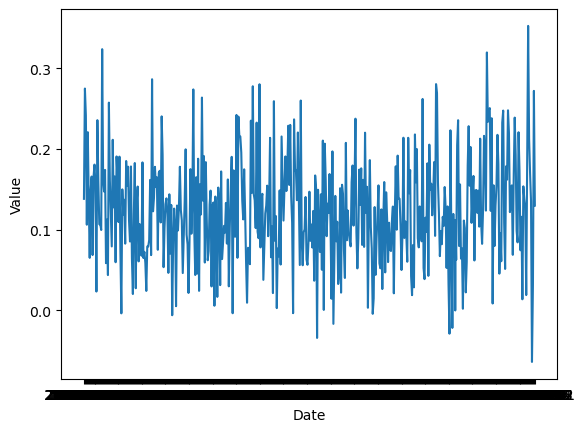

In [31]:
## trial time series plot
plt.plot(df2['Date'], df2['Fishing Report'])
plt.xlabel('Date')
plt.ylabel('Value')


plt.show()

C:\Users\tonym\AppData\Local\Temp\ipykernel_17148\494832343.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df2_smoothed = df2.rolling(window=15).mean()


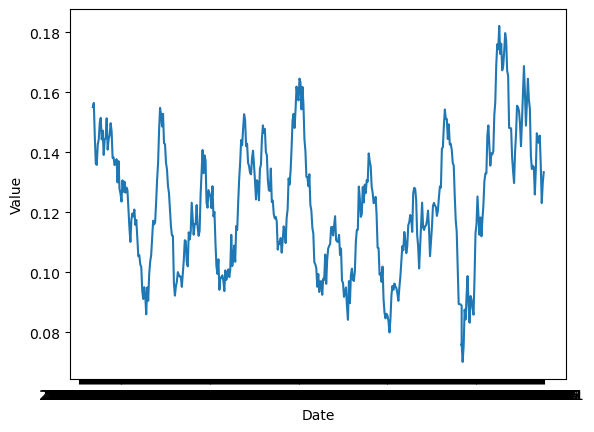

In [32]:
## applying a rolling window function to smooth out the data
df2_smoothed = df2.rolling(window=15).mean()


plt.plot(df2['Date'], df2_smoothed['Fishing Report'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


## 
## 

<p><b> Now we are going to join the rainfall time series data to the dataframe:</b></p>



In [33]:
## reading in the rainfall data from the external .csv

weather = pd.read_csv('binghamtonWeather.csv') ## reading in the data from a csv downloaded from NOAA
weather

,DATE,PRCP
0,2018-01-01,0.00
1,2018-01-02,0.03
2,2018-01-03,0.00
3,2018-01-04,0.00
4,2018-01-05,0.03
5,2018-01-06,0.00
6,2018-01-07,0.00
7,2018-01-08,0.00
8,2018-01-09,0.00
9,2018-01-10,0.00


In [34]:
## joining the rainfall data with the sentiment analysis by date
merged = pd.merge(df2, weather, left_on= 'Date', right_on = 'DATE')

print(merged)

           Date  Fishing Report        DATE  PRCP
0    2023-04-21        0.180648  2023-04-21  0.00
1    2023-04-20        0.153575  2023-04-20  0.00
2    2023-04-19        0.023232  2023-04-19  0.02
3    2023-04-16        0.235750  2023-04-16  0.00
4    2023-04-15        0.159608  2023-04-15  0.00
5    2023-04-14        0.106667  2023-04-14  0.00
6    2023-04-13        0.106626  2023-04-13  0.00
7    2023-04-12        0.099570  2023-04-12   NaN
8    2023-04-08        0.323765  2023-04-08  0.00
9    2023-04-07        0.161296  2023-04-07  0.08
10   2023-04-05        0.147258  2023-04-05  0.00
11   2023-04-02        0.174024  2023-04-02  0.05
12   2022-10-13        0.058420  2022-10-13  0.04
13   2022-10-11        0.112460  2022-10-11  0.00
14   2022-10-10        0.043687  2022-10-10  0.00
15   2022-10-07        0.257480  2022-10-07  0.14
16   2022-10-06        0.161270  2022-10-06  0.02
17   2022-10-03        0.121708  2022-10-03   NaN
18   2022-10-01        0.211409  2022-10-01   NaN


In [35]:
## here, filling in missing values and re-indexing the dataframe
## we make copies along the way as intermediate steps

merged2 = merged.fillna(0.00)
merged3 = merged2.iloc[::-1].reset_index(drop=True)
merged3

,Date,Fishing Report,DATE,PRCP
0,2019-03-31,0.129815,2019-03-31,0.09
1,2019-04-01,0.272026,2019-04-01,0.00
2,2019-04-02,0.032234,2019-04-02,0.00
3,2019-04-03,-0.064028,2019-04-03,0.00
4,2019-04-04,0.135265,2019-04-04,0.00
5,2019-04-05,0.170573,2019-04-05,0.00
6,2019-04-06,0.212761,2019-04-06,0.19
7,2019-04-08,0.352593,2019-04-08,0.13
8,2019-04-09,0.191912,2019-04-09,0.00
9,2019-04-10,0.018889,2019-04-10,0.00


## 
## 

<p><b> Now we are getting closer to type of chart that will be our final product:</b></p>



C:\Users\tonym\AppData\Local\Temp\ipykernel_17148\4270029718.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE', 'Date'], dtype='object')
  merged_smoothed = merged3.rolling(window=30).mean()


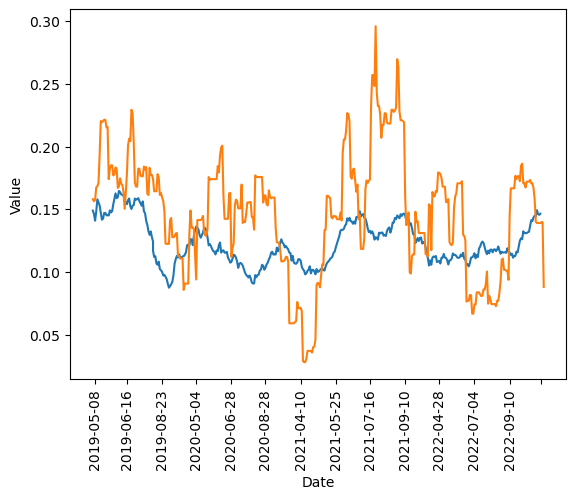

In [36]:
## smoothing data
merged_smoothed = merged3.rolling(window=30).mean()

## time series plot
plt.plot(merged3['DATE'], merged_smoothed['Fishing Report'], merged_smoothed['PRCP'])


plt.xlabel('Date') # labels
months = mdates.MonthLocator()  # Every month
date_fmt = mdates.DateFormatter('%b %Y')  # Format date as 'Month Year'
plt.gca().xaxis.set_major_locator(months)
plt.tick_params(axis='x', rotation=90)
plt.ylabel('Value')


plt.show()

## 
## 

<p><b> Here, we arrive at the chart we are going to use to show Fishing Report Sentiment vs. Rainfall. They are seperate lines with seperate axis:</b></p>



C:\Users\tonym\AppData\Local\Temp\ipykernel_17148\3580223773.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE', 'Date'], dtype='object')
  merged_smoothed = merged3.rolling(window=30).mean()


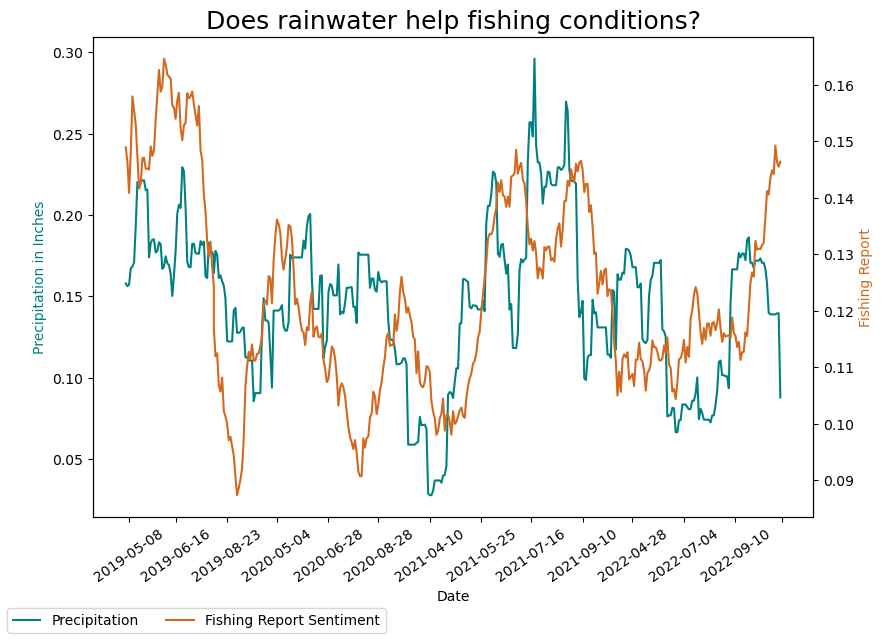

In [126]:
## rolling window to smooth out the data
merged_smoothed = merged3.rolling(window=30).mean()

## time series plot
fig, ax1 = plt.subplots(figsize=(9,6))
fig.subplots_adjust(top=1, bottom=0.20, left=0.1, right=0.9, hspace=0.5, wspace=0.3)
ax1.plot(merged3['DATE'], merged_smoothed['PRCP'], color='teal', label='Precipitation')
ax1.set_xlabel('Date')
ax1.set_ylabel('Precipitation in Inches', color='teal')

# second axis for fishing report data
ax2 = ax1.twinx()
ax2.plot(merged3['DATE'], merged_smoothed['Fishing Report'], color='chocolate', label='Fishing Report Sentiment')
ax2.set_ylabel('Fishing Report', color='chocolate')

# Set the x-axis tick parameters
months = mdates.MonthLocator()  # Every month
date_fmt = mdates.DateFormatter('%b %Y')  # Format date as 'Month Year'
plt.gca().xaxis.set_major_locator(months)
ax1.tick_params(axis='x', rotation=35)


## legend and title
fig.legend(loc='lower left', ncol=2)
ax1.set_title('Does rainwater help fishing conditions?', fontsize = 18) ## chart title
plt.show()


## 
## 

<p><b> Now we bring in the streamflow data from the US Geological Society by reading in that .csv: </b></p>



In [48]:
cfs = pd.read_csv('streamflowClean.csv')

In [49]:
cfs

,DATE,CFS
0,2019-03-01,1788.854167
1,2019-03-02,1466.354167
2,2019-03-03,1244.895833
3,2019-03-04,1081.062500
4,2019-03-05,927.084211
5,2019-03-06,793.421053
6,2019-03-07,720.367647
7,2019-03-08,714.825000
8,2019-03-09,710.819149
9,2019-03-10,734.156250


In [50]:
## here, we merge the steamflow data into the master dataframe we have used all along
merged4 = pd.merge(merged3, cfs, left_on= 'DATE', right_on = 'DATE')
merged4

## 
## 

<p><b> Here, we arrive at the chart we are going to use to show Fishing Report Sentiment vs. Streamflow Data. They are seperate lines with seperate axis:</b></p>


C:\Users\tonym\AppData\Local\Temp\ipykernel_17148\4040449383.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE', 'Date'], dtype='object')
  merged_smoothed2 = merged4.rolling(window=30).mean()


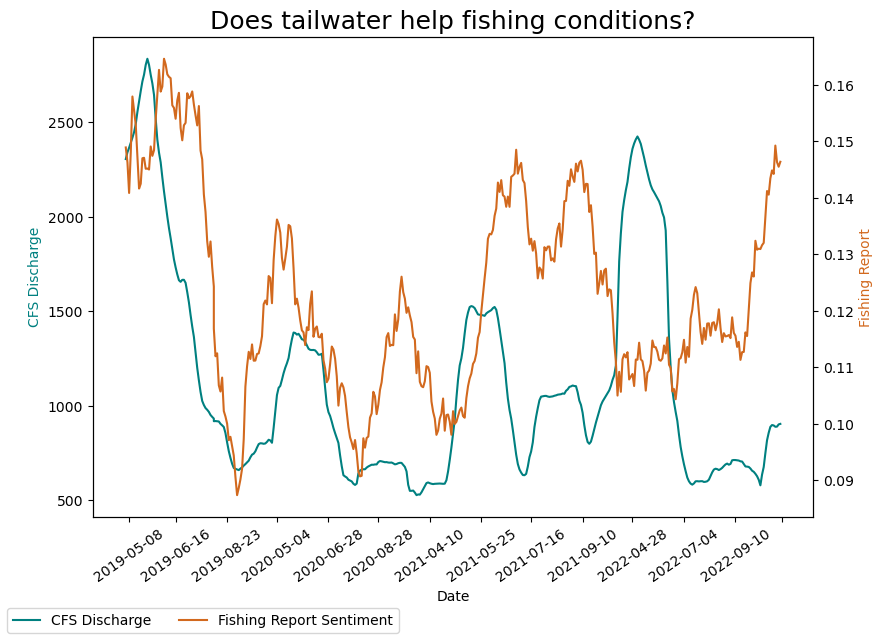

In [125]:
# Apply a rolling window function to smooth out the data
merged_smoothed2 = merged4.rolling(window=30).mean()

# Create a time series plot of the smoothed data
fig, ax1 = plt.subplots(figsize=(9,6))
fig.subplots_adjust(top=1, bottom=0.20, left=0.1, right=0.9, hspace=0.5, wspace=0.3)
ax1.plot(merged4['Date'], merged_smoothed2['CFS'], color='teal', label='CFS Discharge')
ax1.set_xlabel('Date')
ax1.set_ylabel('CFS Discharge', color='teal')

# Create a second axis for the Fishing Report data
ax2 = ax1.twinx()
ax2.plot(merged4['Date'], merged_smoothed2['Fishing Report'], color='chocolate', label='Fishing Report Sentiment')
ax2.set_ylabel('Fishing Report', color='chocolate')

# Set the x-axis tick parameters
months = mdates.MonthLocator()  # Every month
date_fmt = mdates.DateFormatter('%b %Y')  # Format date as 'Month Year'
#ax1.xaxis.set_major_locator(months)
#ax1.xaxis.set_major_formatter(date_fmt)
plt.gca().xaxis.set_major_locator(months)
ax1.tick_params(axis='x', rotation=35)


# Add legend and show the plot
fig.legend(loc='lower left', ncol=2)
ax1.set_title('Does tailwater help fishing conditions?', fontsize = 18) ## chart title
plt.show()